# The Determinate Machine
#### Andrew Ribeiro 
#### July 2019
#### Source: "An Introduction to Cybernetics" by W. Ross Ashby.

In [51]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../Ch2_Change')
from transformation import FiniteTransformation,InfiniteTransformation,VectorTransformation

C:\Users\Andre\Anaconda3\envs\Probability\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Andre\Anaconda3\envs\Probability\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


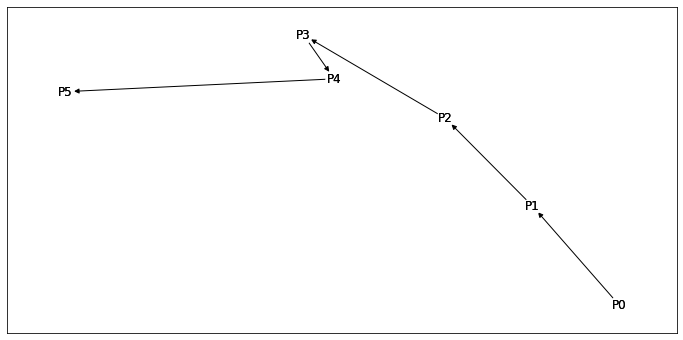

In [2]:
StateMachine = FiniteTransformation(["P0","P1","P2","P3","P4"],lambda x: "P"+str((int(x[1])+1)))
StateMachine.kinematic_graph()

In [3]:
StateMachine.is_single_valued()

True

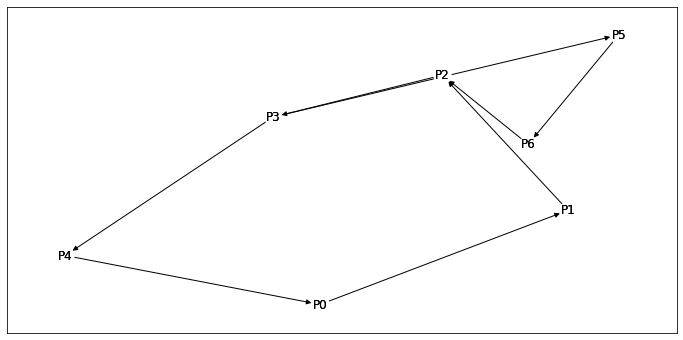

In [4]:
states = [("P0","P1"),("P1","P2"),("P2","P3"),("P3",["P4","P5"]),("P4","P0"),("P5","P6"),("P6","P2")]
BranchingMachine = FiniteTransformation.transitions_to_transformation(states)
BranchingMachine.kinematic_graph()

In [5]:
BranchingMachine.is_single_valued()

False

**Ex.:** Name two states that are related as operand and transform, with time as the operator, taking the dynamic system from: (a) Cooking, (b) Lighting a fire; (c) The petrol engine; (d) Embryological development; (e) Meteorology; (f) Endocrinology; (g) Economics; (h) Animal behaviour; (i) Cosmology (Meticulous accuracy is not required.)

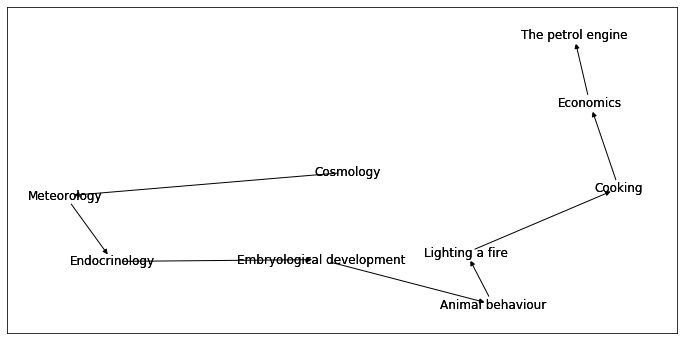

In [6]:
FiniteTransformation.transitions_to_transformation(
    [("Cosmology","Meteorology"),("Meteorology","Endocrinology"),("Endocrinology","Embryological development"),
     ("Embryological development","Animal behaviour"),("Animal behaviour","Lighting a fire"),("Lighting a fire","Cooking"),
     ("Cooking","Economics"),("Economics","The petrol engine")]
).kinematic_graph()

### 3/3. The discrete machine.
**Ex. 1:** A culture medium is inoculated with a thousand bacteria, their number doubles in each half-hour. Write down the corresponding transformation

In [7]:
Bacteria = InfiniteTransformation(lambda x: 1000*(2**x), lambda x: x*2)

**Ex. 2:** (Continued.) Find $n$ after the $\text{1st}, \text{2nd}, \text{3rd},\ldots, \text{6th}$ steps.

In [8]:
Bacteria.transitions(10)

[(1000, 2000),
 (2000, 4000),
 (4000, 8000),
 (8000, 16000),
 (16000, 32000),
 (32000, 64000),
 (64000, 128000),
 (128000, 256000),
 (256000, 512000),
 (512000, 1024000)]

**Ex. 4:** A culture medium contains 109 bacteria and a disinfectant that, in each minute, kills 20 per cent of the survivors. Express the change in the number of survivors as a transformation.

In [9]:
KillBacteria = InfiniteTransformation(lambda x: 109*.8**x, lambda x: x*.8)

**Ex. 5:** ( Continued.) (i) Find the numbers of survivors after 1, 2, 3, 4, 5 minutes. 

In [10]:
KillBacteria.transitions(10)

[(109.0, 87.2),
 (87.2, 69.76),
 (69.76000000000002, 55.80800000000002),
 (55.808000000000014, 44.646400000000014),
 (44.64640000000001, 35.71712000000001),
 (35.71712000000001, 28.57369600000001),
 (28.573696000000012, 22.858956800000012),
 (22.85895680000001, 18.287165440000006),
 (18.28716544000001, 14.629732352000008),
 (14.629732352000007, 11.703785881600005)]

(ii) To what limit does the number tend as time goes on indefinitely?

**Answer:** 0

**Ex. 6:** Draw the kinematic graph of the transformation in which $n'$ is, in a table of four-figure logarithms, the rounded-off right-hand digit of $log_{10} (n+70)$. What would be the behaviour of a corresponding machine?

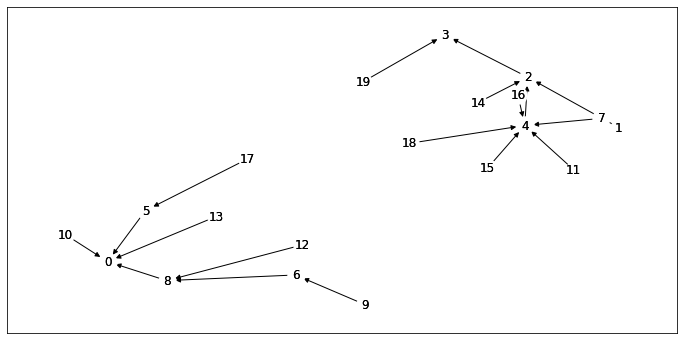

In [11]:
def log_fn(const):
    def tmp(n):
        res = np.log10(n+const)%1
        if res != 0:
            return int(str(res)[5])
        else:
            return 0
    return tmp

InfiniteTransformation(lambda x: x,log_fn(70)).kinematic_graph(20)

**Ex. 7:** (Continued, but with 70 changed to 90).

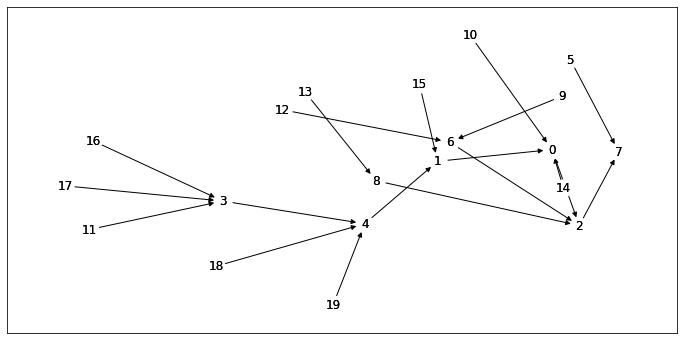

In [12]:
InfiniteTransformation(lambda x: x, log_fn(90)).kinematic_graph(20)

**Ex. 8:** (Continued, but with 70 changed to 10.) How many basins has this graph?

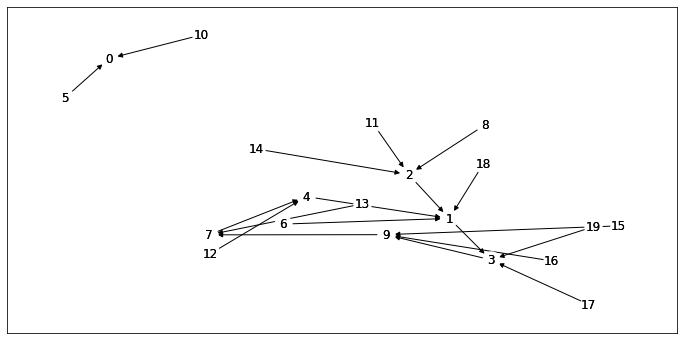

In [13]:
InfiniteTransformation(lambda x: x, log_fn(10)).kinematic_graph(20)

There are two basins. 

**Ex. 9:** In each decade a country’s population diminishes by 10 per cent, but in the same interval a million immigrants are added. Express the change from decade to decade as a transformation, assuming that the changes occur in finite steps.

**Answer:** $n' = n\cdot.90 + 1,000,000$

**Ex. 10:** (Continued.) If the country at one moment has twenty million inhabitants, find what the population will be at the next three decades.

In [14]:
InfiniteTransformation(lambda x: x,lambda x: x*.90 + 1000000).power_chain(2000000,4)

[2000000, 2800000.0, 3520000.0, 4168000.0]

**Ex. 11: (Continued.)** Find, in any way you can, at what number the population will remain stationary. (Hint: when the population is “stationary” what relation exists between the numbers at the beginning and at the end of the decade?—what relation between operand and transform?)

**Answer:** An initial population of $x\cdot.10 = 1000000 \rightarrow x = 10,000,000$, will remain stationary. 

In [15]:
InfiniteTransformation(lambda x: x,lambda x: x*.90 + 1000000).power_chain(10000000,4)

[10000000, 10000000.0, 10000000.0, 10000000.0]

### 3/3. Vectors

In [16]:
N = FiniteTransformation.transitions_to_transformation([(("H","H"),("T","H")),(("H","T"),("T","T")),(("T","H"),("T","H")),(("T","T"),("H","H"))])

In [17]:
N.matrix_representation()

,"(H, H)","(H, T)","(T, H)","(T, T)"
"(H, H)",0.0,0.0,0.0,1.0
"(T, H)",1.0,0.0,1.0,0.0
"(T, T)",0.0,1.0,0.0,0.0


In [18]:
N.power_chain(("H","H"),3)

[('H', 'H'), ('T', 'H'), ('T', 'H')]

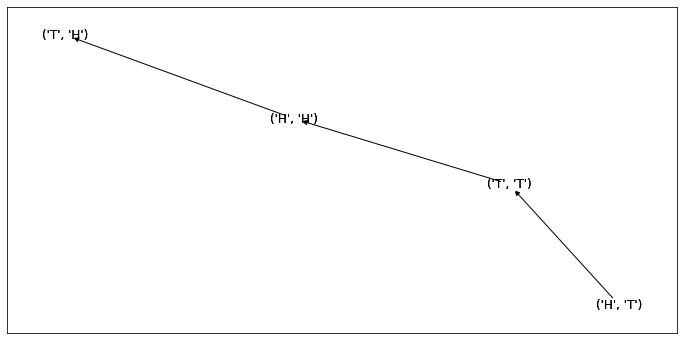

In [19]:
N.kinematic_graph()

**Ex. 1:** Using $ABC$ as first operand, find the transformation generated by repeated application of the operator “move the left-hand letter to the right” (e.g. $ABC \rightarrow BCA$).

In [20]:
def shift_right(tup):
    (a,b,c) = tup
    return (b,c,a)
domain = [("A","B","C"),("C","A","B"),("B","C","A"),("A","C","B"),("C","B","A"),("B","A","C")]
ShiftTrans = FiniteTransformation(domain, shift_right)
ShiftTrans.operator(("A","B","C"))

('B', 'C', 'A')

**Ex. 2:** (Continued.) Express the transformation as a kinematic graph.

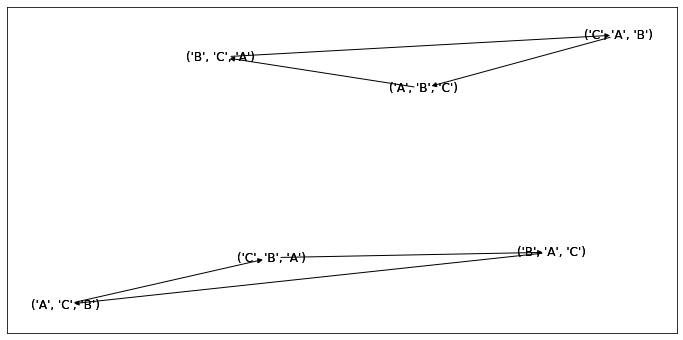

In [21]:
ShiftTrans.kinematic_graph()

**Ex. 3:** Using (1, –1) as first operand, find the other elements generated by repeated application of the operator “interchange the two numbers and then multiply the new left-hand number by minus one”.

In [22]:
def interchange(tup):
    (a,b) = tup
    return (b*-1,a)
Inter = InfiniteTransformation(lambda x: x, interchange)
Inter.power_chain((1,-1),10)

[(1, -1),
 (1, 1),
 (-1, 1),
 (-1, -1),
 (1, -1),
 (1, 1),
 (-1, 1),
 (-1, -1),
 (1, -1),
 (1, 1)]

**Ex. 4:** (Continued.) Express the transformation as a kinematic graph.

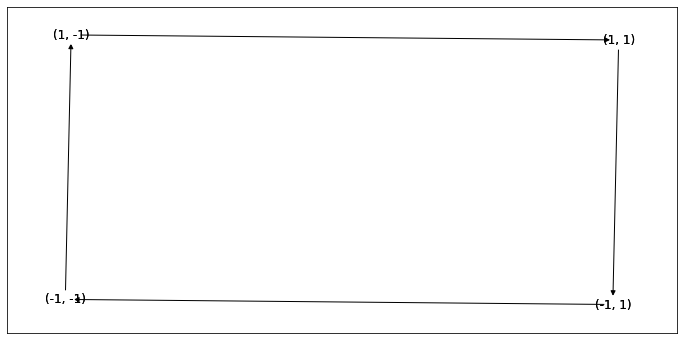

In [23]:
FiniteTransformation.list_to_transformation(Inter.power_chain((1,-1),10)).kinematic_graph()

**Ex. 5:** The first operand, $x$, is the vector $(0,1,1)$; the operator $F$ is defined thus:

* (i) the left-hand number of the transform is the same as the middle number of the operand;

* (ii) the middle number of the transform is the same as the right-hand number of the operand;

* (iii) the right-hand number of the transform is the sum of the operand’s middle and right-hand numbers.

Thus, $F(x)$ is $(1,1,2)$, and $F^2(x)$ is $(1,2,3)$. Find $F^3(x)$, $F^4(x)$, $F^5(x)$. (Hint: compare Ex. 2/14/9.)

In [24]:
def opp(x):
    (a,b,c) = x
    return (b,c,b+c)
F = InfiniteTransformation(lambda x: x, opp)
F.operator((0,1,1))

(1, 1, 2)

In [25]:
F.power(2).operator((0,1,1))

(1, 2, 3)

In [26]:
F.power(3).operator((0,1,1))

(2, 3, 5)

In [27]:
F.power(4).operator((0,1,1))

(3, 5, 8)

In [28]:
F.power(5).operator((0,1,1))

(5, 8, 13)

In [29]:
F.power_chain((0,1,1),6)

[(0, 1, 1), (1, 1, 2), (1, 2, 3), (2, 3, 5), (3, 5, 8), (5, 8, 13)]

### 3/6. Vector Transformations 

In [30]:
F = VectorTransformation([lambda vec: vec[1], lambda vec: vec[2], lambda vec: vec[1] + vec[2]])
F([1,2,3])

[2, 3, 5]

**Ex. 1:** If the operands are of the form $(a,b)$, and one of them is $(1/2,2)$, find the vectors produced by repeated application to it of the transformation T. 

In [31]:
T = VectorTransformation([lambda vec: vec[1],lambda vec: -vec[0]])
T([1/2,2])

[2, -0.5]

In [32]:
(T**2)([1/2,2])

D


True

**Ex. 2:** If the operands are vectors of the form $(v,w,x,y,z)$ and U is (omitted, see book or code below) find $U(a)$, where $a = (2,1,0,2,2)$.

In [33]:
U = VectorTransformation([lambda vect: vect[1],lambda vect: vect[0],lambda vect: vect[2], lambda vect: vect[4],lambda vect: vect[3]])
a = [2,1,0,2,2]
U(a)

[1, 2, 0, 2, 2]

**Ex. 5:** Find the transform of $(3, – 2,1)$ by A if the general form is $(g,h,j)$ and the transformation is:

In [34]:
A = VectorTransformation([lambda v: 2*v[0] - v[1],lambda v: v[1] - v[2], lambda v: v[0] + v[1]])
A([3,-2,1])

[8, -3, 1]

**Ex. 6:** Arthur and Bill agree to have a gamble. Each is to divide his money into two equal parts, and at the umpire’s signal each is to pass one part over to the other player. Each is then again to divide his new wealth into two equal parts and at a signal to pass a half to the other; and so on. Arthur started with 8/-and Bill with 4/-. Represent the initial operand by the vector $(8,4)$. Find, in any way you can, all its subsequent transforms.

In [35]:
ArthurAndBill = VectorTransformation([lambda v: v[1]/2 +  v[0]/2, lambda v: v[1]/2 +  v[0]/2])
ArthurAndBill.power_chain([8,4], 5)

[[8, 4], [6.0, 6.0], [6.0, 6.0], [6.0, 6.0], [6.0, 6.0]]

**Ex. 11:** In an aquarium two species of animalcule are prey and predator. In each day, each predator destroys one prey, and also divides to become two predators. If today the aquarium has m prey and n predators, express their changes as a transformation.

In [42]:
#(m,n)
Aquarium = VectorTransformation([lambda v: v[0]-v[1], lambda v: 2*v[1]], lambda v: v[0] >= 0 and v[1] >= 0)

**Ex. 13:** (Continued.) If the state was initially $(150,10)$, find how it changed over the first four days.

In [43]:
Aquarium = VectorTransformation([lambda v: v[0]-v[1], lambda v: 2*v[1]])
Aquarium.power_chain([150,10],5)

[[150, 10], [140, 20], [120, 40], [80, 80], [0, 160]]

**Ex. 14:** A certain pendulum swings approximately in accordance with the transformation $x' = \frac{1}{2}(x–y)$, $y' = \frac{1}{2}(x + y)$, where x is its angular deviation from the vertical and $y$ is its angular velocity; $x'$ and $y'$ are their values one second later. It starts from the state $(10,10)$; find how its angular deviation changes from second to second over the first eight seconds. (Hint: find $x'$, $x''$, $x'''$, etc.; can they be found without calculating $y'$, $y''$, etc.?)

In [65]:
#(x,y)
Pendulum = VectorTransformation([lambda v: 0.5*(v[0]-v[1]), lambda v: 0.5*(v[0]+v[1])])
pedulum_simulation = Pendulum.power_chain([10,10],50)[1:]
pedulum_simulation[0:8]

[[0.0, 10.0],
 [-5.0, 5.0],
 [-5.0, 0.0],
 [-2.5, -2.5],
 [0.0, -2.5],
 [1.25, -1.25],
 [1.25, 0.0],
 [0.625, 0.625]]

**Ex. 15:** (Continued.) Draw an ordinary graph (with axes for $x$ and $t$) showing how $x$’s value changed with time. Is the pendulum frictionless ?

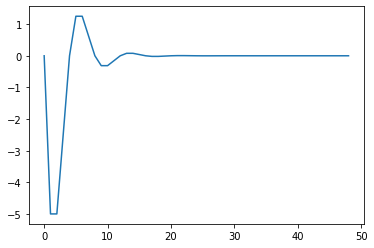

In [66]:
plt.plot(range(len(pedulum_simulation)),list(map(lambda x: x[0],pedulum_simulation)))

This is not a frictionless pendulum because it loses energy overtime and eventually comes to an equilibrium around 0. 

**Ex. 16:** In a certain economic system a new law enacts that at each yearly readjustment the wages shall be raised by as many shillings as the price index exceeds 100 in points. The economic effect of wages on the price index is such that at the end of any year the price index has become equal to the wage rate at the beginning of the year. Express the changes of wage-level and price-index over the year as a transformation.

In [84]:
# (price index, wages)
EconomicSystem = VectorTransformation([lambda v: v[1], lambda v: v[1] + (v[0] - 100)])

**Ex. 17:** (Continued.) If this year starts with the wages at $110$ and the price index at $110$, find what their values will be over the next ten years.

In [87]:
EconomicSystem.power_chain([110,110],4)

[[110, 110], [110, 120], [120, 130], [130, 150]]